In [1]:
import sys
import os
XCr_path = os.getcwd()+'/../'
sys.path.append(XCr_path)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from XCrystal import *
import time

In [2]:
XCr_path

'/global/cscratch1/sd/krzywins/CRYSTALBPMExpl/crystal-fft-bpm/examples/../'

In [3]:
xcr = XCrystal(XCr_path+'/config/Si44417keVConstanStrainGradient.yaml')
xcr.convr

86154339588.68605

In [4]:
def single_realization(delta_theta, omega):
    
    xcr = XCrystal(XCr_path+'/Si44417keVConstanStrainGradient.yaml', omega)
    xcr.configure(delta_theta)
    xcr.run3D()
    
    return xcr.Reflectivity, xcr.Transmission

def single_realization_with_data(delta_theta):
    
    xcr = XCrystal(XCr_path+'/config/Si44417keVConstanStrainGradient.yaml')
    xcr.configure(delta_theta)
    xcr.run3D()
    
    return xcr.Reflectivity, xcr.Transmission, xcr.U1_field, xcr.U2_field, xcr.u, xcr.M

In [39]:
U1_data = []
U2_data = []

Rs, Ts, U1_xyz, U2_xyz, up, MM = single_realization_with_data(-22e-6)
U1_data.append(U1_xyz)
U2_data.append(U2_xyz)

U1_xyz = np.asarray(U1_data)
U2_xyz = np.asarray(U2_data)

Delta theta:  -2.2e-05 ; Reflectivity:  0.3873715096848393 ; Transmission:  0.1478664785881328 PhaseRefl 1.9444972147078046


In [40]:
kmax=U1_xyz.shape[3]
kmax

51

In [41]:
logh1=((xcr.Xx-xcr.sep1) >= (-xcr.HH )) * ((xcr.Xx-xcr.sep1) <=(xcr.HH ))
logh2=((xcr.Xx-xcr.sep1) >= (-xcr.HH*0.9 )) * ((xcr.Xx-xcr.sep1) <=(xcr.HH*0.9 ))
logh1h2=logh1^logh2
logh1h2.shape
xcr.Xx.shape


(3200, 1)

In [42]:
log_hJ=np.zeros((xcr.xgrid,kmax))      
for i in range(xcr.xgrid):
    for k in range(kmax):
        log_hJ[i,k]=logh1h2[i]

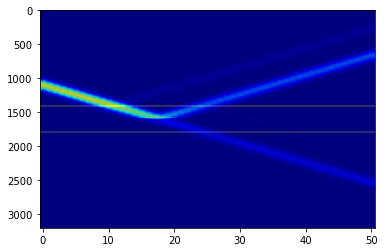

In [44]:
plt.imshow(np.abs(U1_xyz[0,:,0,:]**2 + U2_xyz[0,:,0,:]**2), aspect='auto',cmap='jet')
plt.imshow(log_hJ, aspect='auto',cmap='jet', alpha=0.2)

In [33]:
2+2

4